In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [ ]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc  = AdaBoostClassifier()

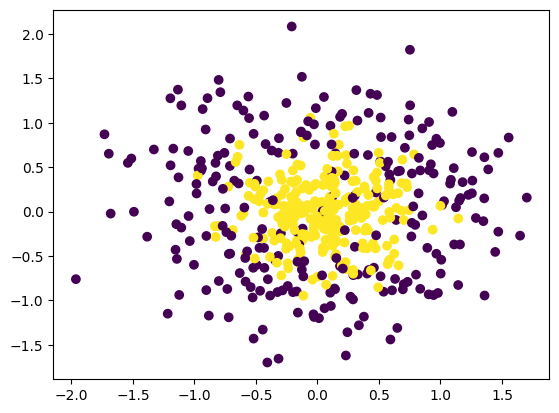

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
abc.fit(X,y)

AdaBoostClassifier()

In [ ]:
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(abc,X,y,scoring = 'accuracy',cv =10))

0.786

# Now use with parameter

In [ ]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

In [ ]:
abc1 = AdaBoostClassifier(n_estimators= 10)

In [ ]:
abc1.fit(X,y)

AdaBoostClassifier(n_estimators=10)

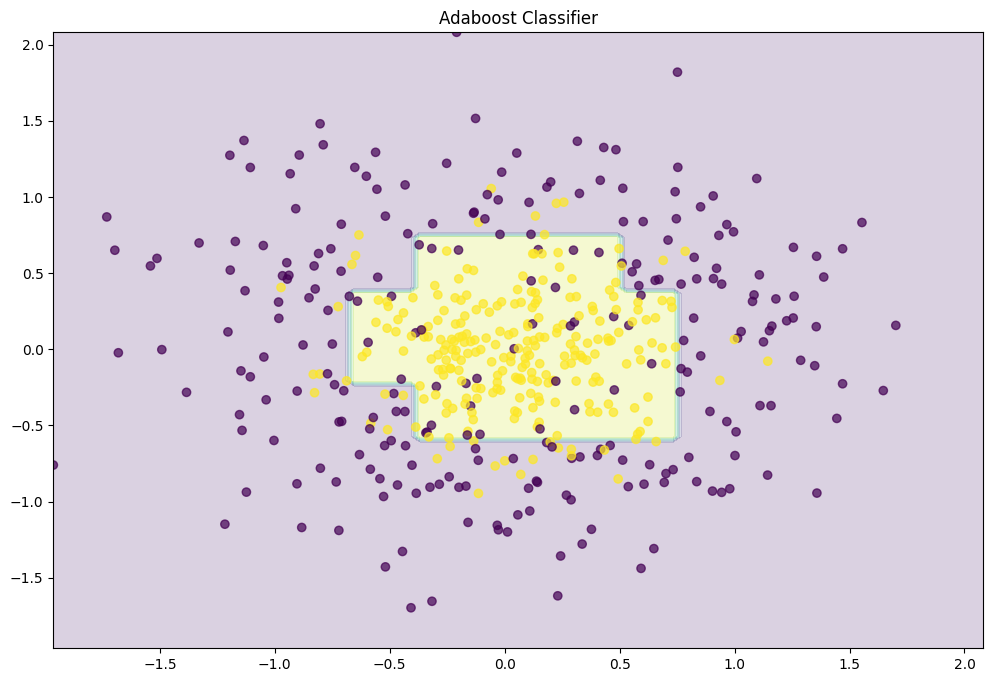

In [ ]:
plot_decision_boundary(abc1)

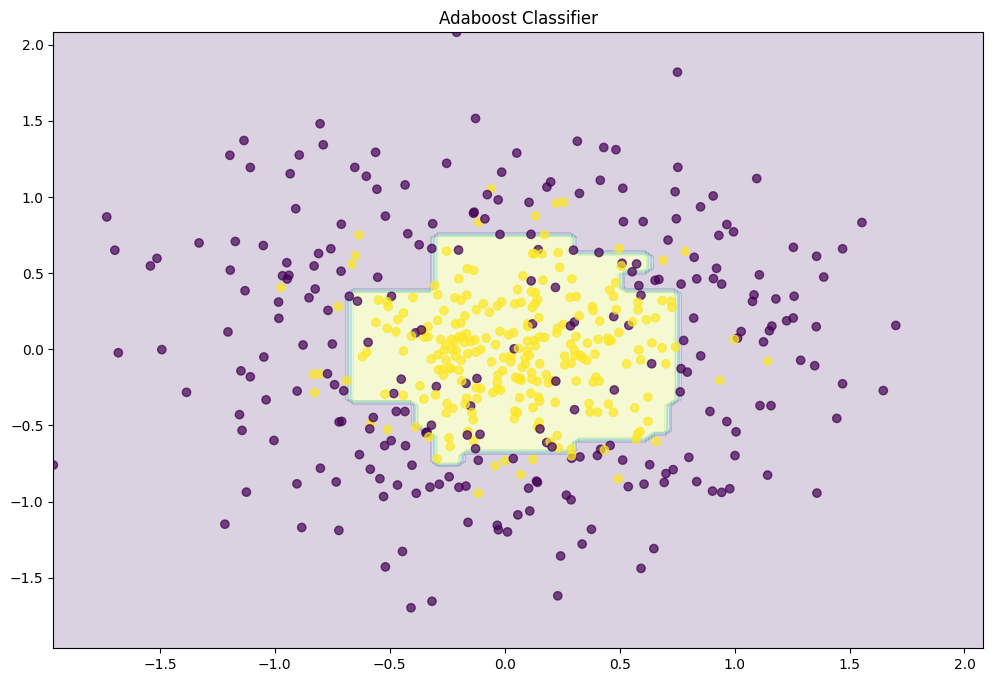

In [ ]:
abc2 = AdaBoostClassifier(n_estimators= 500,learning_rate= 0.1)
abc2.fit(X,y)
plot_decision_boundary(abc2)

# hyper parameter tuning

In [ ]:
param = {
    "n_estimators":[10,50,100,200,400],
    "learning_rate":[0.0001,0.001,0.01,0.1],
    "algorithm":['SAMME','SAMME.R']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator = AdaBoostClassifier(), param_grid= param , n_jobs =-1,cv=10,scoring='accuracy')

In [ ]:
cv.fit(X,y)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'n_estimators': [10, 50, 100, 200, 400]},
             scoring='accuracy')

In [ ]:
print("best parameters are:"cv.best_params_)

In [ ]:
print("best result is:",cv.best_score_)